Fysiikan lopputyö:

In [20]:
from math import radians, cos, sin ,asin, sqrt
import pandas as pd
import numpy as np

df_GPS = pd.read_csv('Location.csv')
df_GPS.head()

,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m)
0,1.159230,65.012356,25.484788,14.434555,NaN,NaN,13.443000,1.411916
1,1.275021,65.012356,25.484788,14.434555,NaN,NaN,14.248000,1.572916
2,22.550230,65.012580,25.484735,13.534467,NaN,NaN,16.150999,2.568806
3,42.634230,65.012707,25.484547,13.534407,NaN,NaN,22.066000,1.000000
4,62.685230,65.012523,25.484760,13.534490,NaN,NaN,13.072000,2.055093


In [21]:
def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r 


df_GPS['distance'] = np.zeros(len(df_GPS))
df_GPS['time_diff'] = np.zeros(len(df_GPS))
df_GPS['Velocity'] = np.zeros(len(df_GPS))

# Etäisyydet ja nopeudet
for i in range(len(df_GPS)-1):

    # Peräkkäisten pisteiden välinen etäisyys
    df_GPS.loc[i, 'distance'] = haversine(df_GPS['Longitude (°)'][i], df_GPS['Latitude (°)'][i], df_GPS['Longitude (°)'][i+1], df_GPS['Latitude (°)'][i+1]) * 1000  # metriä
    
    #Lasketaan aikaväli
    df_GPS.loc[i, 'time_diff'] = df_GPS['Time (s)'][i+1] - df_GPS['Time (s)'][i]
    
    # Nopeus (m/s)
    if df_GPS.loc[i, 'time_diff'] > 0:
        df_GPS.loc[i, 'Velocity'] = df_GPS.loc[i, 'distance'] / df_GPS.loc[i, 'time_diff']

# Kumulatiivinen matka
df_GPS['koko_matka'] = np.cumsum(df_GPS['distance'])


df_GPS.head()

,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m),distance,time_diff,Velocity,koko_matka
0,1.159230,65.012356,25.484788,14.434555,NaN,NaN,13.443000,1.411916,0.000000,0.115791,0.000000,0.000000
1,1.275021,65.012356,25.484788,14.434555,NaN,NaN,14.248000,1.572916,25.044702,21.275209,1.177178,25.044702
2,22.550230,65.012580,25.484735,13.534467,NaN,NaN,16.150999,2.568806,16.610767,20.084000,0.827065,41.655469
3,42.634230,65.012707,25.484547,13.534407,NaN,NaN,22.066000,1.000000,22.767456,20.051000,1.135477,64.422925
4,62.685230,65.012523,25.484760,13.534490,NaN,NaN,13.072000,2.055093,6.817449,19.971000,0.341367,71.240374


In [22]:
#Kartta kävelystä alueesta: 

import folium

start_lat = df_GPS['Latitude (°)'].mean()
start_long = df_GPS['Longitude (°)'].mean()
my_map = folium.Map(location = [start_lat, start_long], zoom_start = 15)

folium.PolyLine(df_GPS[['Latitude (°)', 'Longitude (°)']], color = 'red', weight = 3 ,opacity = 1 ).add_to(my_map)

my_map.save('kartta.html')
my_map

In [23]:

 #datan alustaminen:

import pandas as pd
import numpy as np


df_steps = pd.read_csv("Linear Acceleration.csv")

df_steps.head()


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.008632,0.022603,-0.254632,0.976982
1,0.053337,1.111986,-0.262357,0.415404
2,0.058305,0.779256,-0.101584,0.214903
3,0.063272,0.989303,-0.245592,0.391050
4,0.068240,0.870198,-0.163152,0.312180


(100.0, 200.0)

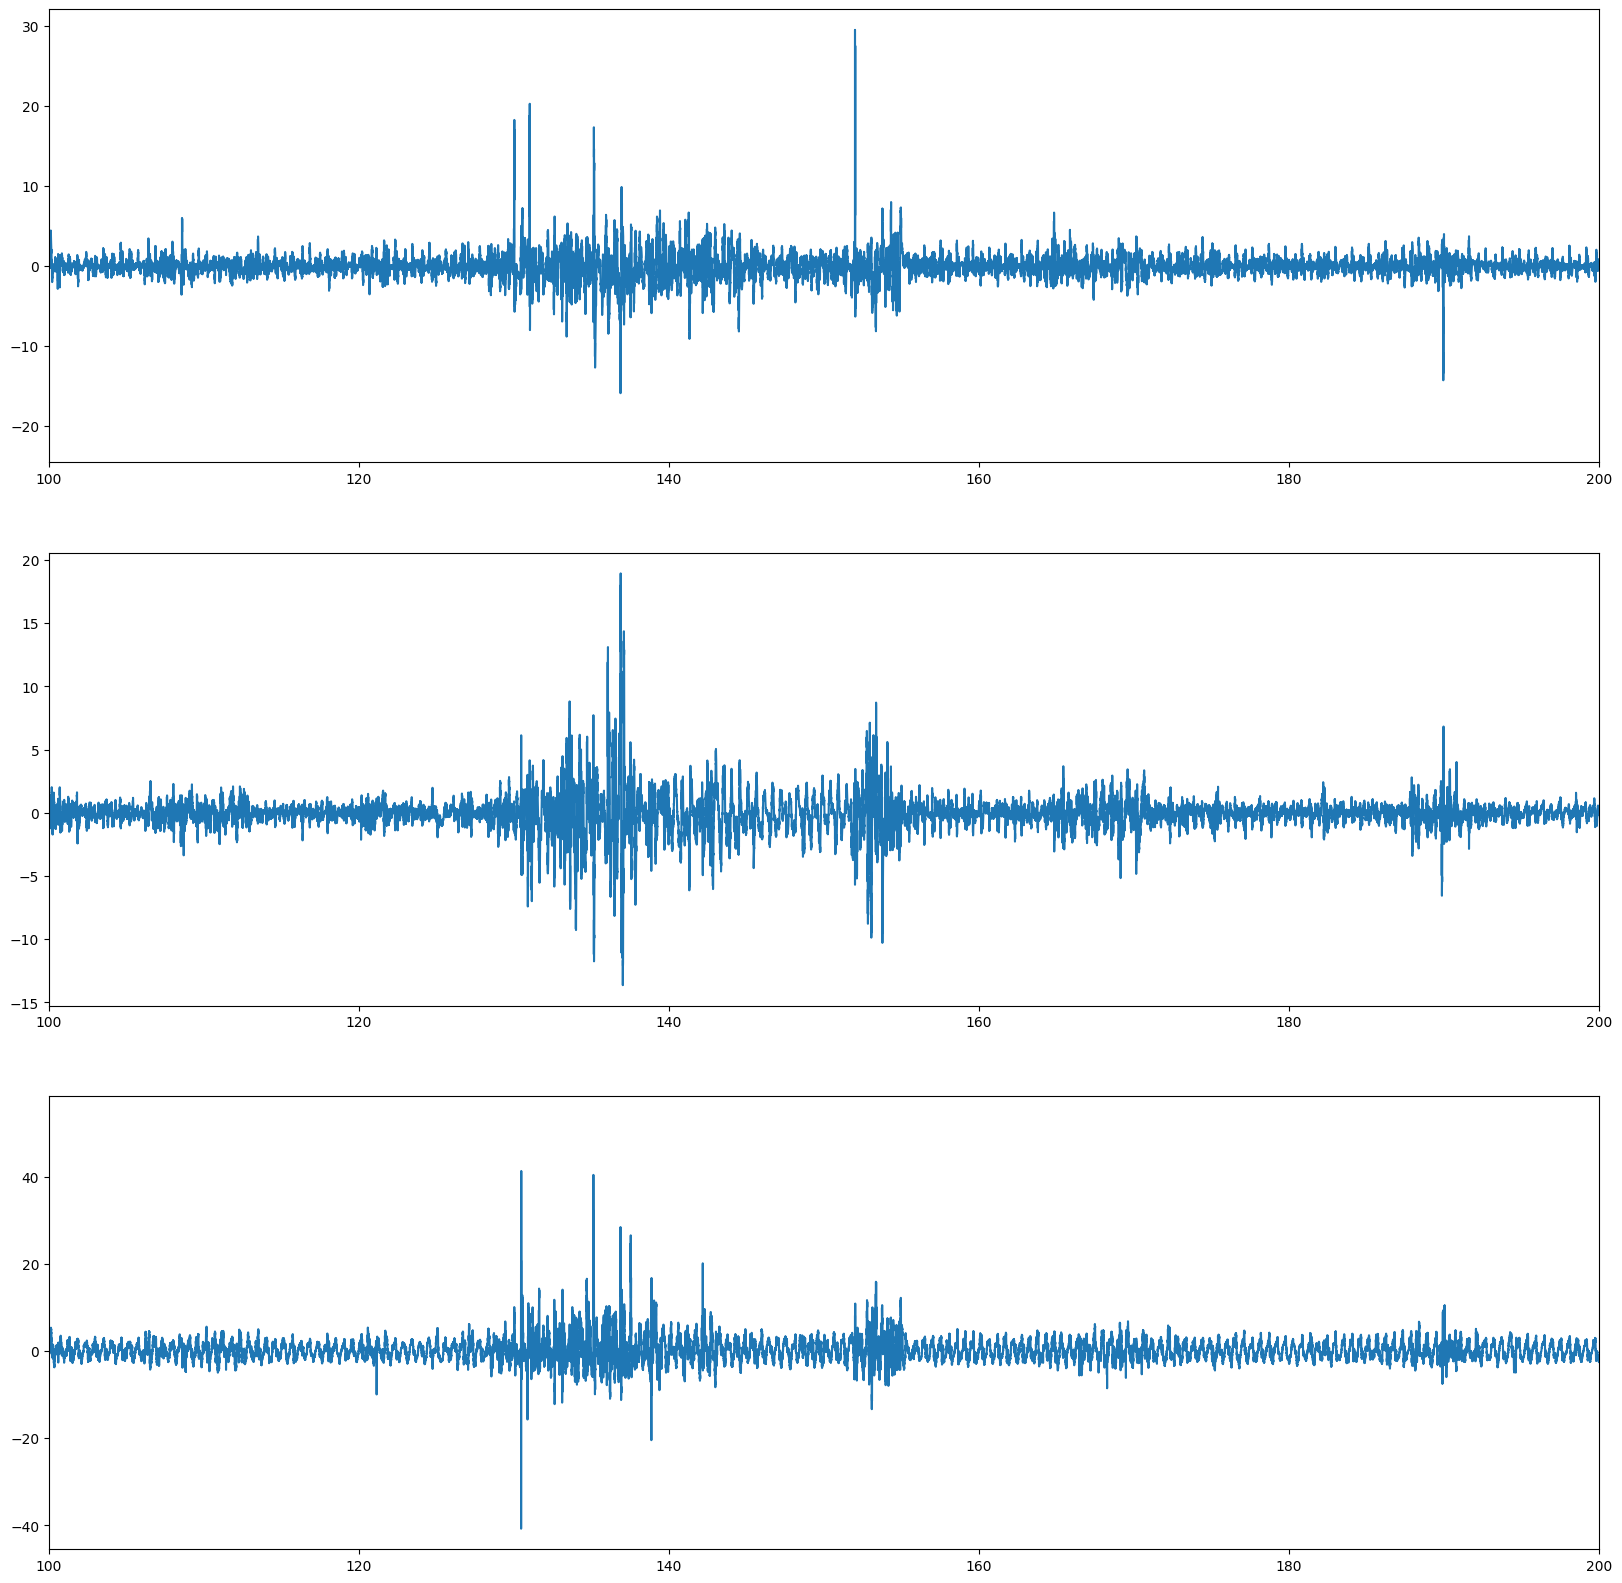

In [24]:
#Valitaan kiihtyvyysdataa parhaiten kuvaavan komponentin (x, y ,z) kuvaaja:
import matplotlib.pyplot as plt

df_steps = pd.read_csv("Linear Acceleration.csv")

plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(df_steps['Time (s)'],df_steps['Linear Acceleration x (m/s^2)'])
plt.xlim([100, 200]) 

plt.subplot(3,1,2)
plt.plot(df_steps['Time (s)'],df_steps['Linear Acceleration y (m/s^2)'])
plt.xlim([100, 200]) 

plt.subplot(3,1,3)
plt.plot(df_steps['Time (s)'],df_steps['Linear Acceleration z (m/s^2)'])
plt.xlim([100, 200]) 
#Näiden perusteella kuvaaja z, kuvaa parhaiten kiihtyvyyttä, joten valitaan se

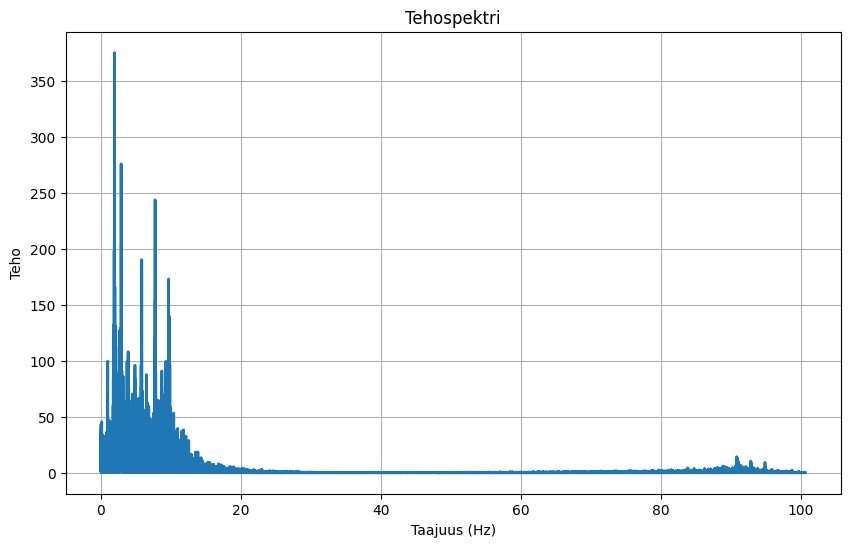

In [31]:
#Fourier-analyysi kiihtyvyysdatasta:

t = df_steps['Time (s)']
f = df_steps['Linear Acceleration x (m/s^2)'].values

# Fourier muunnos
N = len(f)  # Datapisteiden lukumäärä signaalissa
dt = np.mean(np.diff(df_steps['Time (s)']))
#dt = t[1] - t[0]  # Näytteenottoväli, datapisteiden ajallinen välimatka

fourier = np.fft.fft(f, N)

# Tehospektri
psd  = fourier*np.conj(fourier)/N


#Taajuudet
freq = np.fft.fftfreq(N, dt)
L = np.arange(1, np.floor(N / 2), dtype='int')
PSD = np.array([freq[L], psd[L].real])  



plt.figure(figsize=(10, 6))
plt.plot( PSD[0,:], PSD[1,:], linewidth = 2)
plt.grid()
#plt.xlim([0, 24]
plt.title('Tehospektri')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.show()

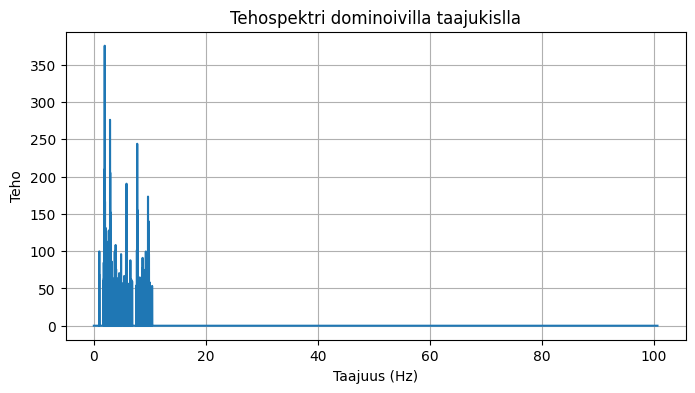

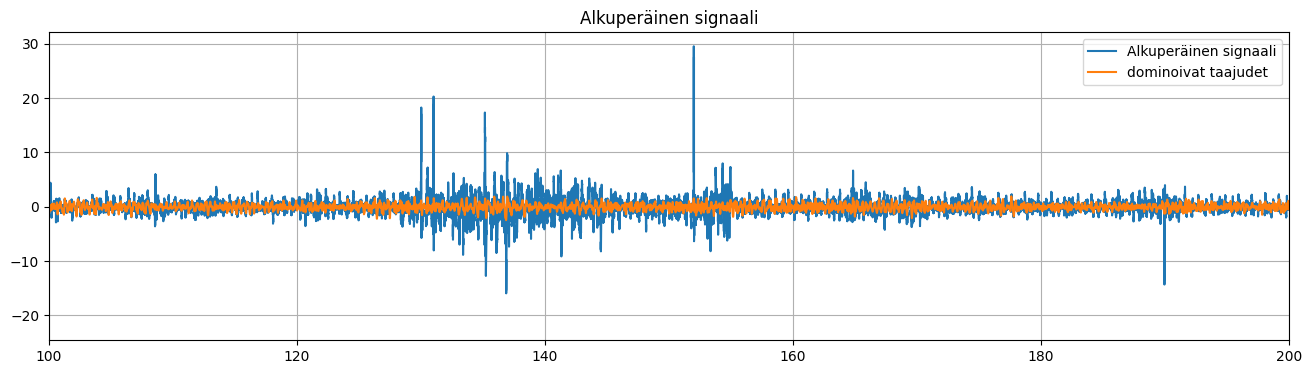

Tehokkain taajuus: 1.94 Hz


In [40]:
fourier_dom = fourier.copy()
fourier_dom[psd<50] = 0


#Tehospektri: 
psd_dom = fourier*np.conj(fourier_dom) / N
#psd_dom = 2.0 / N * np.abs(fourier_dom) ** 2


#freq = 1/(dt*N)*np.arange(N) #Taajuudet

PSD_dom = np.array([freq[L], psd_dom[L].real]) #Taajudet ja tehospektrin arvot


plt.figure(figsize=(8,4))
plt.plot(PSD_dom[0,:], PSD_dom [1,:])
plt.grid()
plt.title('Tehospektri dominoivilla taajukislla')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.show()

signal_dom = np.fft.ifft(fourier_dom).real
plt.figure(figsize=(16,4))
plt.plot(df_steps['Time (s)'],df_steps['Linear Acceleration x (m/s^2)'])
plt.plot(df_steps['Time (s)'], signal_dom)
plt.legend(['Alkuperäinen signaali',  'dominoivat taajudet'])
plt.grid()
plt.xlim([100, 200]) 
#plt.xlim([0, 10]) #Zoomaa tietoja ensimmäiseltä 10s
plt.title('Alkuperäinen signaali')
plt.show()

tehokkain_taajuus_indeksi = np.argmax(psd[L].real)
tehokkain_taajuus = freq[L][tehokkain_taajuus_indeksi]

print(f"Tehokkain taajuus: {tehokkain_taajuus:.2f} Hz")

C:\Users\Miro\AppData\Local\Temp\ipykernel_2848\220056919.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


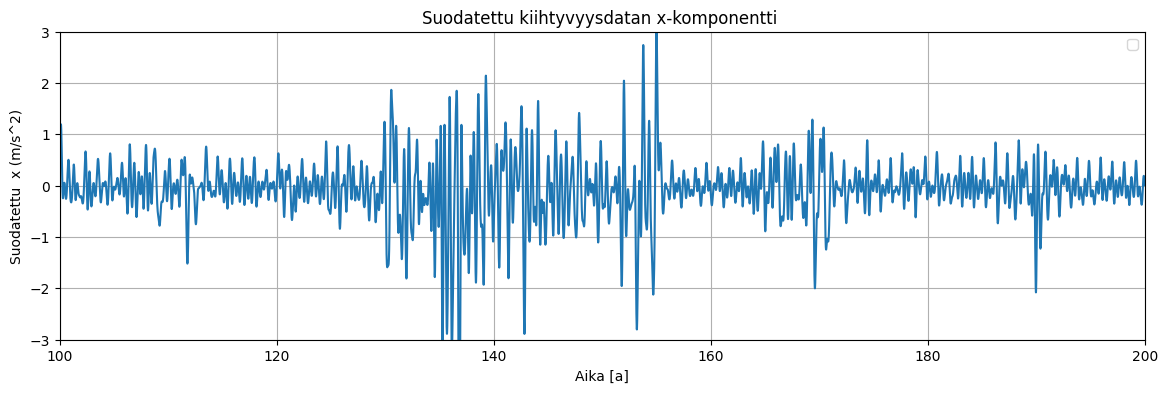

In [43]:
from scipy.signal import butter, filtfilt

# Butterworth matala suodatin funktio
def butter_lowpass_filter(data, cutoff, nyq, order):
    normal_cutoff = cutoff / nyq
    # Suodattimen kertoimien laskenta
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Suodatuksen parametrit
T = df_steps['Time (s)'].iloc[-1] - df_steps['Time (s)'].iloc[0]  # Koko datan pituus
n = len(df_steps['Time (s)'])  # Datapisteiden lukumäärä
fs = n / T  # Näytteenottotaajuus
nyq = fs / 2  # Nyquist-taajuus
order = 3  # Suodattimen kertaluku
cutoff = 3  # Cutoff taajuus Hz

# Suodatetun signaalin luonti
new_signal = butter_lowpass_filter(df_steps['Linear Acceleration x (m/s^2)'], cutoff, nyq, order)

# Suodatettu signaali:
plt.figure(figsize=(14,4))
plt.plot(df_steps['Time (s)'], new_signal)

plt.xlim([50, 200])  
plt.grid()
plt.axis([100, 200, -3, 3])
plt.xlabel('Aika [a]')
plt.ylabel('Suodatettu  x (m/s^2)')
plt.legend()
plt.title('Suodatettu kiihtyvyysdatan x-komponentti ')
plt.show()


In [46]:
#Kaikki mittaukset numeroina:

#Askelmäärä suodatuksen mukaan:
jaksot = 0
for i in range(len(new_signal)-1):
    if new_signal[i]/new_signal[i+1] < 0:
        jaksot = jaksot + 1
total_steps_filter = np.floor(jaksot/2)   
print('Askelmäärä mittausten perusteella: ', total_steps_filter) 

#Askelmäärä Fourier-analyysin mukaan:
Koko_aika = df_steps['Time (s)'].iloc[-1] - df_steps['Time (s)'].iloc[0]  
Askel_Per_S = tehokkain_taajuus #0.21 hz
total_steps_Fourier = Askel_Per_S * Koko_aika
print('Askelmäärä laskettuna Fourier-analyysin avulla: ', total_steps_Fourier) 

#Kokonais matka laskettuna:
KokoMatka = df_GPS['koko_matka'].iloc[-2] /1000
print('Kokonais matka kilometreinä:', KokoMatka)

Askelmäärä mittausten perusteella:  1154.0
Askelmäärä laskettuna Fourier-analyysin avulla:  1129.9903391554885
Kokonais matka kilometreinä: 2.6024448909567535
